In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib as mpl
mpl.rc('image', cmap='gray')

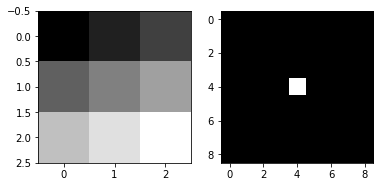

In [10]:
image = np.full((9, 9), 0)
filt = np.linspace(0, 1, 9, dtype = np.float32).reshape((3,3))
image[4,4] = 255
plt.subplot(1,2,1)
plt.imshow(filt)
plt.subplot(1,2,2)
plt.imshow(image/255)

In [26]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .   
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .   
    .   The function does actually compute correlation, not the convolution:
    .   
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .   
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    

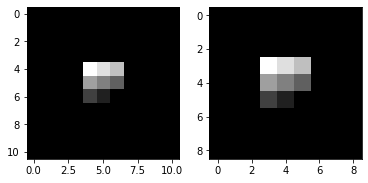

In [30]:
from scipy.signal import correlate
corr1 = correlate(image, filt)
plt.subplot(1,2,1)
plt.imshow(corr1)

plt.subplot(1,2,2)
corr2 = cv2.filter2D(image.astype(np.uint8), -1, filt, borderType = cv2.BORDER_REFLECT101)
plt.imshow(corr2/255)